In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

u,c=np.unique(y_train,return_counts=True)

print("Train labels:",dict(zip(u,c)))

u,c=np.unique(y_test,return_counts=True)

print("Test labels:",dict(zip(u,c)))



Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


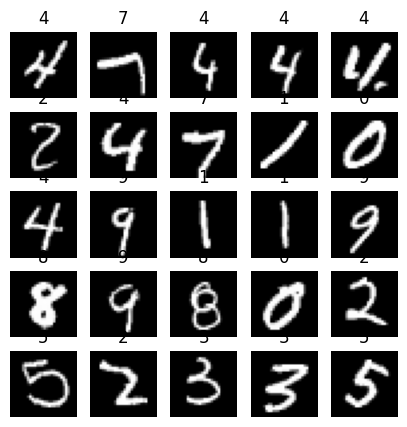

In [ ]:
indexes=np.random.randint(0,X_train.shape[0],size=25)

images=X_train[indexes]
labels=y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  image=images[i]
  plt.title(labels[i])
  plt.imshow(image,cmap='gray')
  plt.axis("off")
plt.show()




In [ ]:
num_labels=len(np.unique(y_train))
# one hot encoding 7 -> 0 0 0 0 0 0 0 1 0 0 

y_train=tf.keras.utils.to_categorical(y_train)

y_test=tf.keras.utils.to_categorical(y_test)

y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# girdi hesabı
print(X_train.shape)
img_size=X_train.shape[1]
input_size=img_size*img_size

X_train=np.reshape(X_train,[-1,input_size])
X_test=np.reshape(X_test,[-1,input_size])

# olcekleme

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255


(60000, 28, 28)


In [ ]:
model=Sequential()
model.add(Dense(512,input_dim=input_size,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(num_labels,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback=[EarlyStopping(monitor="val_loss",patience=3)]

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(X_train,y_train,epochs=25,batch_size=128,validation_split=0.2,callbacks=callback)

Epoch 1/25
375/375 [==============================] - 10s 25ms/step - loss: 0.8370 - accuracy: 0.9081 - val_loss: 0.4425 - val_accuracy: 0.9617
Epoch 2/25
375/375 [==============================] - 8s 21ms/step - loss: 0.3811 - accuracy: 0.9555 - val_loss: 0.3027 - val_accuracy: 0.9638
Epoch 3/25
375/375 [==============================] - 8s 22ms/step - loss: 0.2867 - accuracy: 0.9624 - val_loss: 0.2596 - val_accuracy: 0.9660
Epoch 4/25
375/375 [==============================] - 9s 24ms/step - loss: 0.2616 - accuracy: 0.9642 - val_loss: 0.2781 - val_accuracy: 0.9554
Epoch 5/25
375/375 [==============================] - 9s 23ms/step - loss: 0.2454 - accuracy: 0.9657 - val_loss: 0.2390 - val_accuracy: 0.9664
Epoch 6/25
375/375 [==============================] - 8s 23ms/step - loss: 0.2370 - accuracy: 0.9676 - val_loss: 0.2223 - val_accuracy: 0.9712
Epoch 7/25
375/375 [==============================] - 10s 26ms/step - loss: 0.2282 - accuracy: 0.9688 - val_loss: 0.2290 - val_accuracy: 0.97

In [ ]:
scores=model.evaluate(X_train,y_train)
print("Training Accuracy:",scores[1]*100)

scores=model.evaluate(X_test,y_test)
print("Test Accuracy:",scores[1]*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1537 - accuracy: 0.9848
Training Accuracy: 98.47999811172485
313/313 [==============================] - 1s 5ms/step - loss: 0.1826 - accuracy: 0.9764
Test Accuracy: 97.64000177383423


In [ ]:
pred=model.predict(X_test)


y_pred=np.argmax(pred,axis=-1)

y_test[0]

313/313 [==============================] - 1s 4ms/step


7

In [ ]:
y_test[0]

7

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


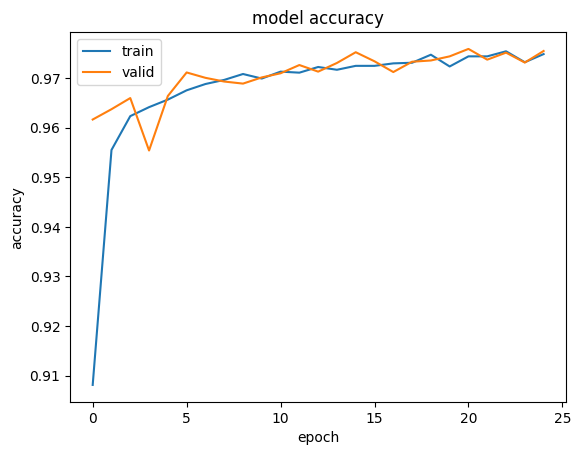

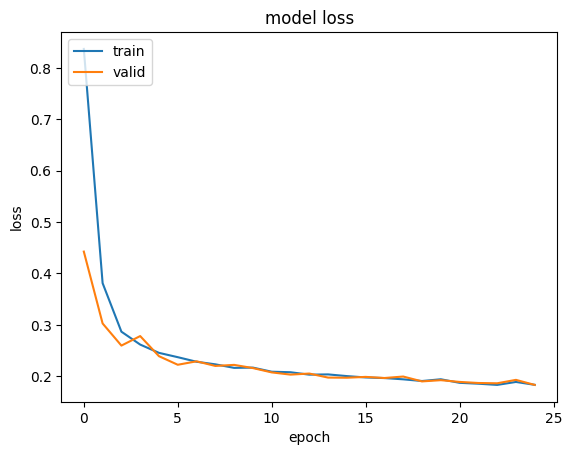

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()